# P4. Optimisez la gestion des données d'une boutique avec R ou Python 

##  Introduction

## 1. Importation des librairies

In [1]:
#Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Graphigues
import seaborn as sns #Graphiques
import folium

## 1.1. Importation des fichiers

In [2]:
erp=pd.read_excel(r'C:\Users\Admin\Desktop\P5_LEVERT_Benoit\erp.xlsx')
liaison=pd.read_excel(r'C:\Users\Admin\Desktop\P5_LEVERT_Benoit\liaison.xlsx')
site_web_nnull=pd.read_excel(r'C:\Users\Admin\Desktop\P5_LEVERT_Benoit\web.xlsx')


C:\Users\Admin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Admin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Admin\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## 2. Exploration des fichiers

## 2.1. Exploration du fichier 'erp'

In [3]:
#data exploration
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [4]:
# data exploration
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
#data exploration
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [6]:
#Aucun doublon sur notre primary 'key product_id', les identifiants sont tous distincts.
erp['product_id'].duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Name: product_id, Length: 825, dtype: bool>

In [7]:
#Detection des doublons 
erp.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

## 2.2. Exploration du fichier 'liaison'

In [8]:
#data exploration
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [9]:
#data exploration
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [10]:
# data exploration
liaison.describe(include='all')

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


In [11]:
#Detection des doublons 
liaison.duplicated().sum()

0

## 2.3. Exploration du fichier 'site_web'

In [12]:
#data explotation
site_web_nnull

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-Saint Joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-Saint Joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [13]:
# data exploration
site_web_nnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [14]:
#data explopration
site_web_nnull.describe(include='all')

C:\Users\Admin\AppData\Local\Temp\ipykernel_456\1261668567.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  site_web_nnull.describe(include='all')
C:\Users\Admin\AppData\Local\Temp\ipykernel_456\1261668567.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  site_web_nnull.describe(include='all')
C:\Users\Admin\AppData\Local\Temp\ipykernel_456\1261668567.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the fut

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,...,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,bon-cadeau-25-euros,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,...,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


In [15]:
#Détection des doublons sur notre primary key 'sku'.
site_web_nnull['sku'].duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Name: sku, Length: 1513, dtype: bool>

In [16]:
site_web_nnull.duplicated().sum()

82

In [17]:
#On selctionne les données contenant la description 'product'
site_web_nnull = site_web_nnull[site_web_nnull['post_type']=='product']

# 2.  Questions de Laurent

## 2.1. Laurent veut que nous rapprochions les deux exports 

In [18]:
#Commençons par renommer la colonne " id web " par " sku, pour pouvoir faire notre jointure par la suite
liaison.rename(columns={'id_web':'sku'}, inplace=True)

In [19]:
liaison.head()

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [20]:
#Rapprochons nos bases de données : erp et site_web grace à la table liaison en 2 étapes
#Vérifions notre merge avec la fonction indicator 
site_web_liaison=site_web_nnull.merge(liaison,  how='outer', on='sku', indicator=True)
site_web_liaison[site_web_liaison['_merge']!='both']


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id,_merge
896,13771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4289,right_only
897,15065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4568,right_only
898,14785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4584,right_only
899,12601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4741,right_only
900,15154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4864,right_only
901,14360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4869,right_only
902,15608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4921,right_only
903,15586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4922,right_only
904,15272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5018,right_only
905,15630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5021,right_only


On remarque que notre merge n'a pas pris en compte toutes les informations dans les deux tables.

In [21]:
#Après ces vérifications on peut supprimer la colonne "_merge" de notre première jointure
site_web_liaison=site_web_liaison.drop('_merge',axis=1)

In [22]:
site_web_liaison.duplicated().sum()

0

In [23]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [24]:
#Rapprochons nos bases de données : erp et site_web_liaison grace à la table liaison
#Vérifions notre merge avec la fonction indicator 

erp_site_web=erp.merge(site_web_liaison, how='left', on='product_id',indicator=True)
erp_site_web[erp_site_web['_merge']!='both']


,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge


In [25]:
#Après ces vérifications on peut supprimer la colonne "_merge" de notre première jointure
erp_site_web=erp_site_web.drop('_merge',axis=1)

In [26]:

erp_site_web.head(6)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,pierre-jean-villa-Saint Joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,pierre-jean-villa-Saint Joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
5,4040,1,34.3,0,outofstock,15303,0.0,0.0,0.0,0.0,...,pierre-jean-villa-Saint Joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [27]:
#On supprime nos doublons
site_web_liaison = site_web_liaison.drop_duplicates().reset_index(drop=True)
site_web_liaison.duplicated().sum()

0

In [28]:
#On supprime nos doublons
erp_site_web = erp_site_web.drop_duplicates().reset_index(drop=True)
erp_site_web.duplicated().sum()

0

## 2.2. Laurent souhaiterais avoir le chiffre d’affaires par produit  

In [29]:
#On renomme 'post_title' par 'product_name'
erp_site_web.rename(columns={'post_title' : 'product_name'}, inplace = True )

In [30]:
#Calcul du C.A par produit et implentation du résltat dans le dataframe
erp_site_web['product_turnover'] = erp_site_web['total_sales']*erp_site_web['price']


In [31]:
#Sélection des colonnes souhaitée pour répondre à la premiere question de Laurent 
resultat=erp_site_web.loc[:,['product_id','price','total_sales','product_turnover','product_name',]]
resultat

,product_id,price,total_sales,product_turnover,product_name
0,3847,24.2,6.0,145.2,Pierre Jean Villa Saint Joseph Préface 2018
1,3849,34.3,0.0,0.0,Pierre Jean Villa Saint Joseph Rouge Tildé 2017
2,3850,20.8,0.0,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
3,4032,14.1,3.0,42.3,Pierre Jean Villa IGP Collines Rhodaniennes Ga...
4,4039,46.0,0.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017
...,...,...,...,...,...
911,7204,45.0,0.0,0.0,Pierre Jean Villa Côte Rôtie Fongeant 2017
912,7204,45.0,0.0,0.0,Pierre Jean Villa Condrieu Jardin Suspendu 2018
913,7247,54.8,0.0,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
914,7329,26.5,NaN,NaN,NaN


## 2.3. Laurent souhaiterais avoir le chiffre d’affaires total des ventes en ligne

In [32]:
#Affichage du C.A générer uniquement par les ventes en ligne
total_web_sales=resultat['product_turnover'].sum()
total_web_sales

70568.6

Le chiffre d’affaires total des ventes en ligne est de 70 568 euros.

## 2.3. Détections des valeurs  aberrantes sur le prix des produits

<AxesSubplot:xlabel='price'>

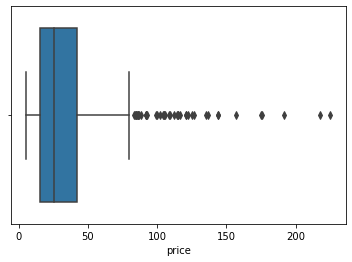

In [33]:
#boxplot
#Détection des valeurs aberrantes à l'aide d'un graphique
sns.boxplot(x=erp_site_web['price'])

In [43]:
#Detection des outliers; Méthode interquartile
Q1 = erp_site_web.price.quantile(0.25)
Q3 = erp_site_web.price.quantile(0.75)
Q1, Q3

(15.3, 42.2)

In [44]:
#IQR = Quartile3 – Quartile1
IQR = Q3 - Q1
IQR

26.900000000000002

In [46]:
limite_inférieure = Q1 - 2*IQR
limite_supérieure = Q3 + 2*IQR
limite_inférieure, limite_supérieure

(-38.5, 96.0)

In [47]:
#Affichage des données considérées comme des outliers, c'est à dire en dessous de notre limite inférieure et au dessus de notre limite_supérieure

erp_site_web[(erp_site_web.price>limite_supérieure) | (erp_site_web.price<limite_inférieure)]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_turnover,zscore
69,4115,1,100.0,11,instock,15382,0.0,0.0,0.0,0.0,...,2020-02-08 10:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.573907
216,4352,1,225.0,0,outofstock,15940,0.0,0.0,0.0,0.0,...,2020-03-07 10:18:45,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1125.0,7.345696
218,4355,1,126.5,2,instock,12589,0.0,0.0,0.0,0.0,...,2020-08-13 08:15:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1391.5,3.585526
235,4402,1,176.0,8,instock,3510,0.0,0.0,0.0,0.0,...,2020-08-22 09:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,2288.0,5.475154
236,4404,1,108.5,2,instock,3507,0.0,0.0,0.0,0.0,...,2020-08-12 07:30:16,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,217.0,2.898389
238,4406,1,157.0,3,instock,7819,0.0,0.0,0.0,0.0,...,2020-03-14 15:05:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.749843
239,4407,1,104.0,6,instock,3509,0.0,0.0,0.0,0.0,...,2020-07-04 07:45:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,104.0,2.726604
251,4582,1,109.6,7,instock,12857,0.0,0.0,0.0,0.0,...,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,2.940380
253,4594,1,144.0,0,outofstock,NaN,0.0,0.0,0.0,0.0,...,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.253577
254,4594,1,144.0,0,outofstock,NaN,0.0,0.0,0.0,0.0,...,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0,4.253577
